In [3]:
import numpy as np
import pandas as pd
from copy import deepcopy
from cdv_plugins import d_plugins
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

In [4]:
df_api = pd.read_csv("../db/cdv/cordova_API.csv")
df_permission = pd.read_csv("../db/cdv/cordova_PERMISSION.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [5]:
df_api.columns

Index(['apk_name', 'battery-status', 'camera', 'contacts', 'device', 'dialogs',
       'file', 'geolocation', 'globalization', 'inappbrowser', 'media',
       'media-capture', 'network-information', 'splashscreen', 'statusbar',
       'vibration'],
      dtype='object')

In [6]:
l_api = list(df_api.columns)
l_permission = df_permission.columns

In [7]:
l_api

['apk_name',
 'battery-status',
 'camera',
 'contacts',
 'device',
 'dialogs',
 'file',
 'geolocation',
 'globalization',
 'inappbrowser',
 'media',
 'media-capture',
 'network-information',
 'splashscreen',
 'statusbar',
 'vibration']

In [8]:
"successCallback" in l_api

False

In [9]:
df_api

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,1,5,0,0,2,1,7,0,0,0,2,0,0,0,0,0
1,10,5,0,0,1,0,7,1,0,0,2,0,1,0,0,0
2,100,5,0,0,29,15,7,1,0,0,3,0,1,0,0,0
3,101,5,6,1,6,2,5,2,0,0,2,3,0,0,0,0
4,102,5,1,1,58,2,8,1,1,0,2,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2655,za.co.snapplify.garfield,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2656,za.co.snapplify.lowveldliving,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2657,za.co.snapplify.purpleturtle,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0


# Analyse API calls

## The occurances

### The occurances of funcitons detected for each plugin in each APK

In [10]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,5,0,0,2,1,7,0,0,0,2,0,0,0,0,0
1,5,0,0,1,0,7,1,0,0,2,0,1,0,0,0
2,5,0,0,29,15,7,1,0,0,3,0,1,0,0,0
3,5,6,1,6,2,5,2,0,0,2,3,0,0,0,0
4,5,1,1,58,2,8,1,1,0,2,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2655,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2656,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2657,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0


### The occurance of plugins for entire dataset

In [11]:
total_apk = df_plugins_only.shape[0]
print(f"Total APKs: {total_apk}")
df_cnt = df_plugins_only.astype(bool).sum(axis=0).sort_values(ascending=False)
df_cnt

Total APKs: 2659


device                 2633
file                   2251
media                  2095
battery-status         1982
dialogs                1964
geolocation            1728
network-information    1435
camera                 1374
splashscreen           1157
contacts                935
media-capture           888
globalization           793
statusbar               284
inappbrowser            256
vibration                22
dtype: int64

In [12]:
# percentage of apks using each plugin
df_pct = df_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_pct

device                 99.02
file                   84.66
media                  78.79
battery-status         74.54
dialogs                73.86
geolocation            64.99
network-information    53.97
camera                 51.67
splashscreen           43.51
contacts               35.16
media-capture          33.40
globalization          29.82
statusbar              10.68
inappbrowser            9.63
vibration               0.83
dtype: float64

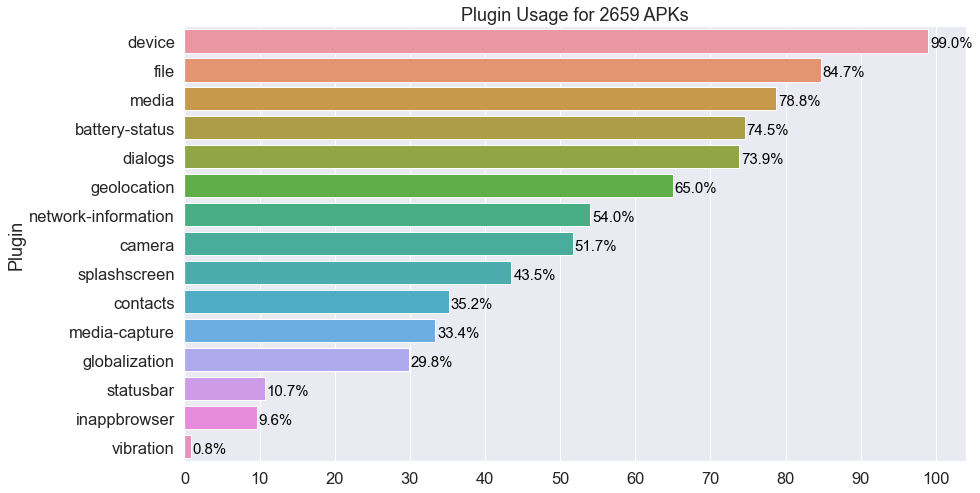

In [13]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_pct.values, y=df_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("")
plt.ylabel("Plugin")
plt.title(f"Plugin Usage for {total_apk} APKs")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

## Heatmap

### Heatmap for Entire database

Text(0.5, 1.0, 'The occurances of funcitons detected for each plugin in each APK')

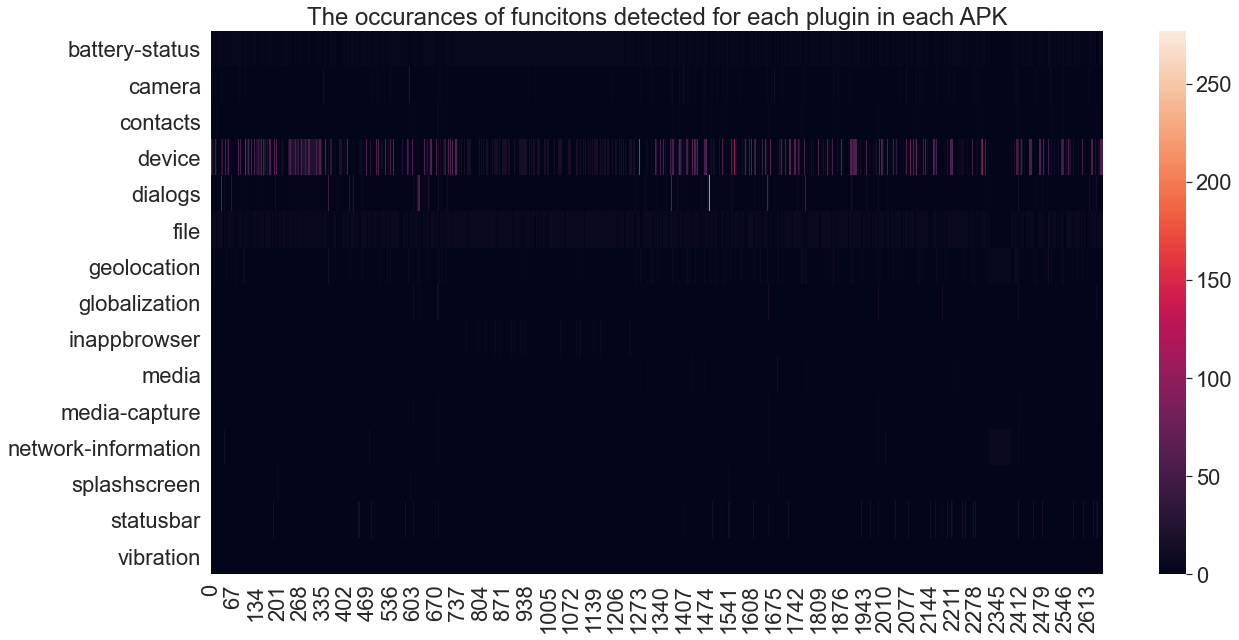

In [14]:
df_plugins_only_T = df_plugins_only.T    # transpose
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T)
plt.title("The occurances of funcitons detected for each plugin in each APK")

### Heatmap for a small set of dataset

Text(0.5, 1.0, 'The occurances of funcitons detected for each plugin in each APK')

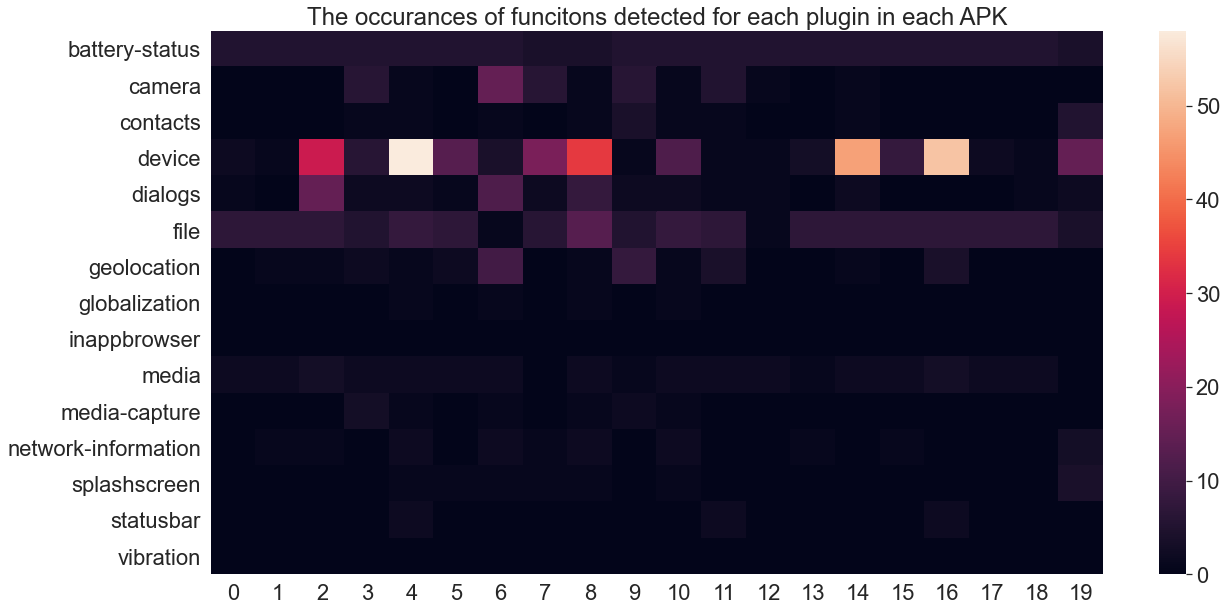

In [15]:
# select a set of apks, originial
set_num = 20
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num])
plt.title("The occurances of funcitons detected for each plugin in each APK")

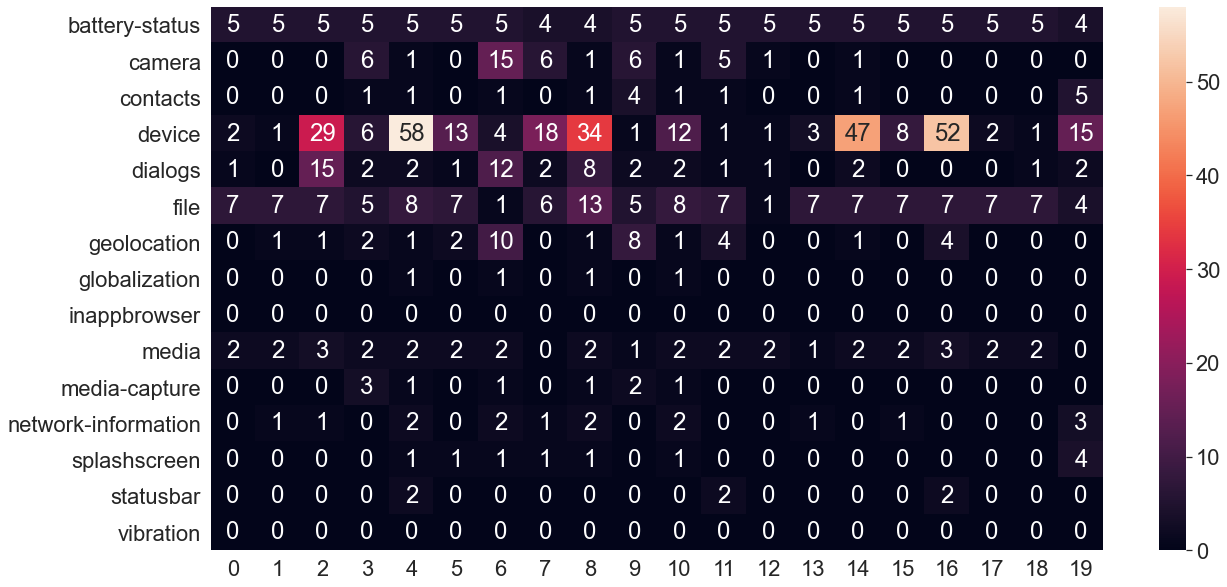

In [16]:
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num], annot=True)

### Heatmap without media and device

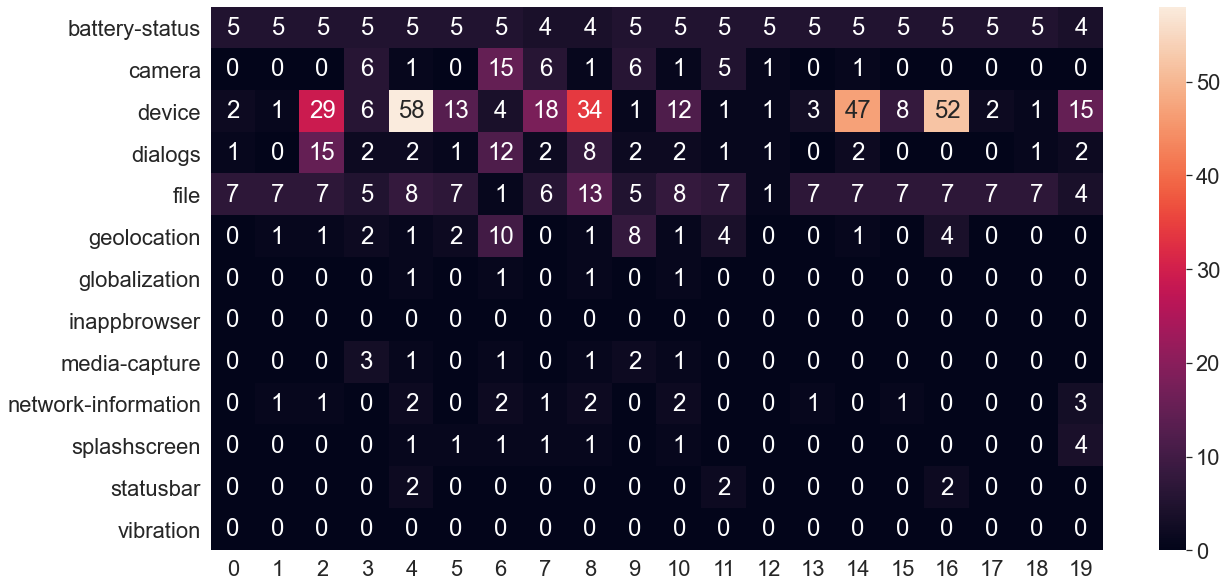

In [17]:

df_plugins_media = df_api.drop(columns=["apk_name", "media", "contacts"])
df_plugins_media_T = df_plugins_media.T
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_media_T.iloc[:, :set_num], annot=True)